**Introduction**

There is an explicit formula for the interpolating polynomial named after Joseph-Louis Lagrange.
It relies on the superposition principle for solving inhomogeneous systems.


**Superposition Principle**

Suppose we know the solutions $x_1, \dots, x_{n+1}$ to the interpolation systems 

   \begin{equation*}
        Ax_k =e_k, \quad k = 1, \cdots, n+1
    \end{equation*}
where $e_1, \dots, e_{n+1}$ are the standard basis vectors of $\mathbb{R}^{n+1}$. Then:

 \begin{equation*}
        A x = y = y_1 e_1 + \cdots + y_{n+1} e_{n+1}
    \end{equation*}
    The solution is given by:
    \begin{equation*}
        x = y_1 x_1 + \cdots + y_{n+1} x_{n+1}
    \end{equation*}
The interpolation equation corresponds to data $y = e_k$, meaning $y_k = 1$ and $y_i = 0$ for $i \neq k$. If we can find the $n+1$ particular interpolating polynomials that realize this very special data, we can use superposition to construct the general interpolating polynomial.

**Lagrange Basis Polynomials**

Theorem 5.19: Given distinct sample points $t_1, \dots, t_{n+1}$, the $k$-th Lagrange interpolating polynomial is:
    \begin{equation}
        L_k(t) = \frac{(t - t_1) \cdots (t - t_{k-1}) (t - t_{k+1}) \cdots (t - t_{n+1})}
        {(t_k - t_1) \cdots (t_k - t_{k-1}) (t_k - t_{k+1}) \cdots (t_k - t_{n+1})}
    \end{equation}
    
   It is the unique polynomial of degree $n$ satisfying:
    
   \begin{equation}
        L_k(t_i) = \begin{cases} 1, & i = k \\ 0, & i \neq k \end{cases}
    \end{equation}
    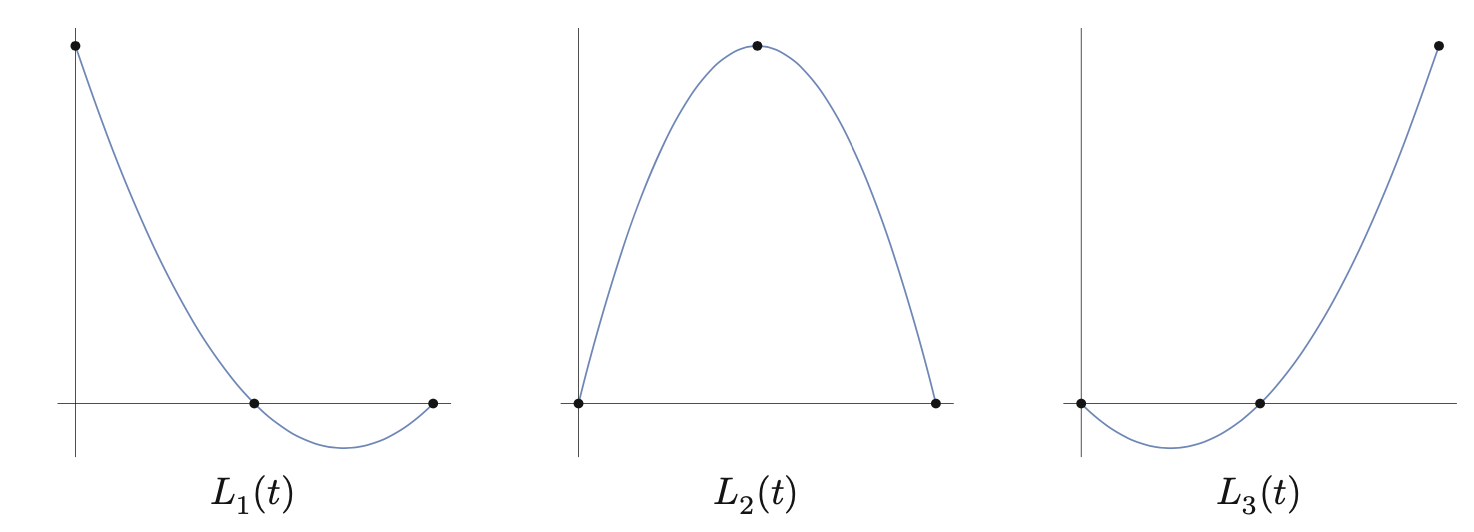
Figure: Lagrange Interpolating Polynomials for the Points 0, .5, 1.

**Interpolating $e^t$**

- Given points: $t_1 = 0$, $t_2 = 0.5$, $t_3 = 1$.
- Construct Lagrange basis polynomials.
- Compute interpolating polynomial and compare with $e^t$.

**Uniqueness and Construction**

The uniqueness follows from a general theorem on polynomial interpolation. To verify correctness:

- If $t = t_i$ for $i \neq k$, the numerator vanishes, making $L_k(t_i) = 0$.
- If $t = t_k$, the numerator and denominator are equal, giving $L_k(t_k) = 1$.

**Lagrange Interpolation Formula:**

Given distinct points $t_1, \dots, t_{n+1}$ and values $y_1, \dots, y_{n+1}$, we construct the interpolating polynomial:
$$
    p(t) = \sum_{i=1}^{n+1} y_i L_i(t),
$$
    where the Lagrange basis polynomials are:
$$
    L_i(t) = \prod_{\substack{j=1 \\ j\neq i}}^{n+1} \frac{t - t_j}{t_i - t_j}.
$$

Verification:

- At $t = t_k$, all terms $L_i(t_k)$ vanish except $L_k(t_k) = 1$, so $p(t_k) = y_k$.  
- Since $p(t)$ is a linear combination of polynomials of degree $\leq n$, it is at most degree $n$.  
- This polynomial is unique by the **uniqueness theorem** for polynomial interpolation.

**Conclusion:** $p(t)$ is the unique interpolating polynomial of degree $\leq n$.

**Lagrange Interpolation for $e^t$**

To approximate $e^t$ over $0 \leq t \leq 1$ using a quadratic polynomial, we choose three interpolation points:
$$
t_0 = 0, \quad t_1 = 0.5, \quad t_2 = 1
$$ 
with corresponding values:
$$
   y_0 = e^0 = 1, \quad y_1 = e^{0.5}, \quad y_2 = e^1 = e.
$$
    The quadratic Lagrange polynomial is:
$$
    p_2(t) = y_0 L_0(t) + y_1 L_1(t) + y_2 L_2(t),
$$
    where the basis polynomials are:
$$
    L_0(t) = \frac{(t - 0.5)(t - 1)}{(0 - 0.5)(0 - 1)},
$$
$$
    L_1(t) = \frac{(t - 0)(t - 1)}{(0.5 - 0)(0.5 - 1)},
$$
$$
    L_2(t) = \frac{(t - 0)(t - 0.5)}{(1 - 0)(1 - 0.5)}.
$$
Thus, the interpolating polynomial is fully determined.

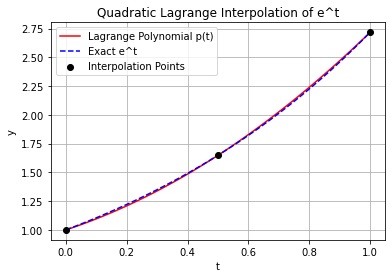

p(0.0) = 1.00000  (true e^0.0 = 1.00000)
p(0.5) = 1.64872  (true e^0.5 = 1.64872)
p(1.0) = 2.71828  (true e^1.0 = 2.71828)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Sample points and function values
# ---------------------------------------------------------
# t_points are the distinct interpolation points
t_points = np.array([0, 0.5, 1])
# y_points are the corresponding values of the function y = e^t
y_points = np.exp(t_points)

# ---------------------------------------------------------
# 2. Define function for Lagrange basis polynomial L_k(t)
# ---------------------------------------------------------
def lagrange_basis(t, t_points, k):
    """
    Compute the k-th Lagrange basis polynomial L_k(t)
    L_k(t) = Π_{i ≠ k} (t - t_i) / (t_k - t_i)
    """
    L = 1
    n = len(t_points)
    for i in range(n):
        if i != k:
            L *= (t - t_points[i]) / (t_points[k] - t_points[i])
    return L

# ---------------------------------------------------------
# 3. Define function for the full Lagrange polynomial p(t)
# ---------------------------------------------------------
def lagrange_polynomial(t, t_points, y_points):
    """
    Compute the Lagrange interpolating polynomial:
    p(t) = Σ y_k * L_k(t) for k = 0..n
    """
    p = 0
    n = len(t_points)
    for k in range(n):
        p += y_points[k] * lagrange_basis(t, t_points, k)
    return p

# ---------------------------------------------------------
# 4. Evaluate the polynomial for smooth plotting
# ---------------------------------------------------------
t_fine = np.linspace(0, 1, 100)  # 100 points between 0 and 1
# Evaluate the Lagrange polynomial at each point in t_fine
y_poly = np.array([lagrange_polynomial(t, t_points, y_points) for t in t_fine])
# Evaluate the exact function for comparison
y_exact = np.exp(t_fine)

# ---------------------------------------------------------
# 5. Plot the results
# ---------------------------------------------------------
plt.plot(t_fine, y_poly, 'r-', label='Lagrange Polynomial p(t)')  # Interpolating polynomial
plt.plot(t_fine, y_exact, 'b--', label='Exact e^t')              # Exact function
plt.scatter(t_points, y_points, color='black', zorder=5, label='Interpolation Points')  # Sample points
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Lagrange Interpolation of e^t')
plt.legend()
plt.grid(True)
plt.show()
# ---------------------------------------------------------
# Step 6: Print polynomial values at the data points to verify interpolation
# ---------------------------------------------------------
for i, t in enumerate(t_points):
    print(f"p({t}) = {lagrange_interpolation(t):.5f}  (true e^{t} = {np.exp(t):.5f})")
